Make a system which tells whether the person will be
save from sinking. What factors were
most likely lead to success-socio-economic
status, age, gender and more.

importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the data (testing and training data)
train=pd.read_csv("titanic-train.csv") 
test=pd.read_csv("titanic-test.csv")

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
test.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [6]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Basic details about the dataset
PassengerId: A unique identifier for each passenger.

Survived: Indicates whether the passenger survived the Titanic disaster (0 = No, 1 = Yes).

Pclass: The passenger's class of travel (1 = 1st class, 2 = 2nd class, 3 = 3rd class).

Name: The passenger's name.

Sex: The passenger's gender (male or female).

Age: The passenger's age in years.

SibSp: The number of siblings/spouses the passenger had aboard the Titanic.

Parch: The number of parents/children the passenger had aboard the Titanic.

Ticket: The ticket number.

Fare: The fare paid by the passenger.

Cabin: The cabin number.

Embarked: The port of embarkation

In [7]:
train.info() 

#provides a concise summary of the DataFrame, including information about the column names, data types, and the number of non-null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
train.describe()

#provides descriptive statistics of a DataFrame. When called on a DataFrame object, it computes various summary statistics for each numerical column in the DataFrame, such as count, mean, standard deviation, minimum, quartiles, and maximum values.

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


EDA Exploratory Data Analysis

In [9]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [10]:
train.select_dtypes(include='object').columns

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [11]:
#numerical variables
numerical = [
    'PassengerId',
    'Age',
    'SibSp',
    'Parch',
    'Fare'
]

#categorical variables
categorical = [
    'Name',
    'Sex',
    'Pclass',
    'Ticket',
    'Cabin',
    'Embarked',
    'Survived'
]

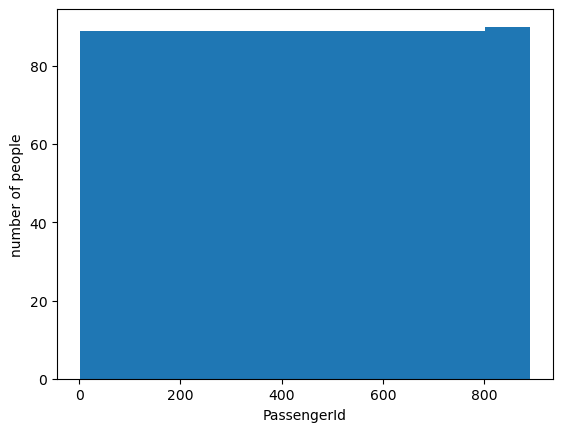

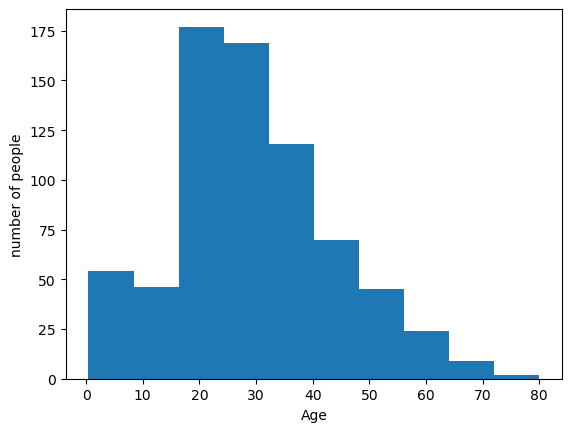

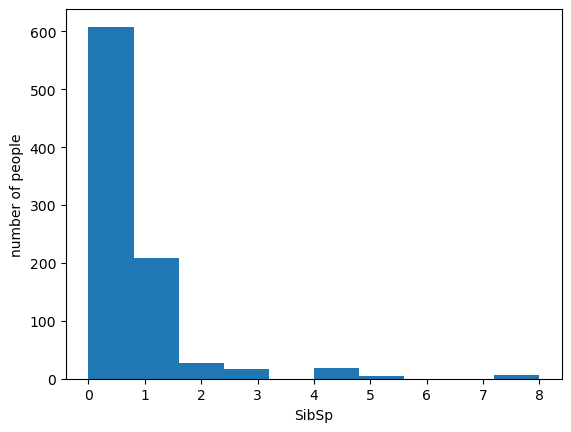

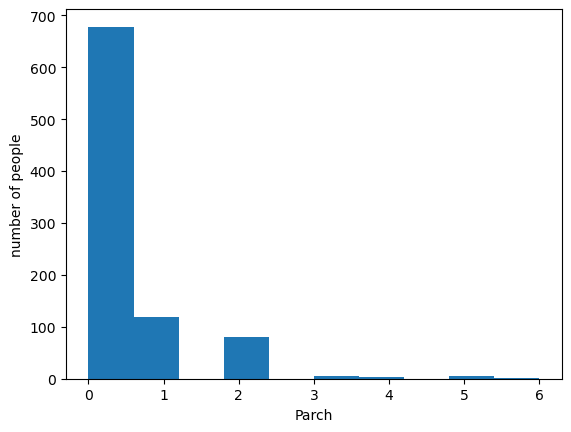

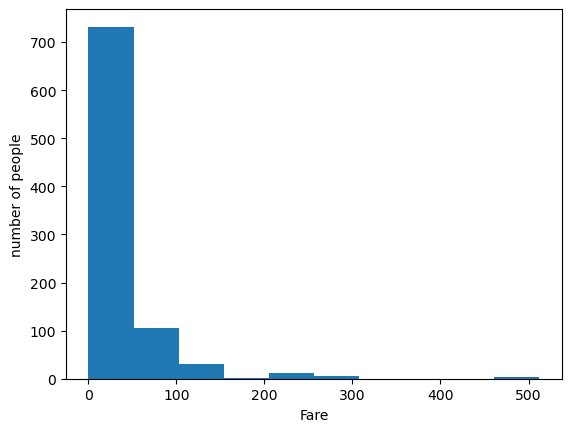

In [12]:
#numerical data distribution
for i in train[numerical].columns:
    plt.hist(train[numerical][i])
    plt.xticks()
    plt.xlabel(i)
    plt.ylabel('number of people')
    plt.show()

C:\Users\sivap\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

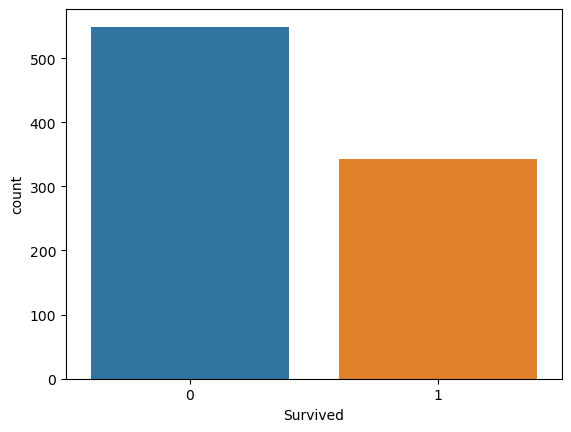

In [13]:
sns.countplot(train['Survived'])

C:\Users\sivap\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='count'>

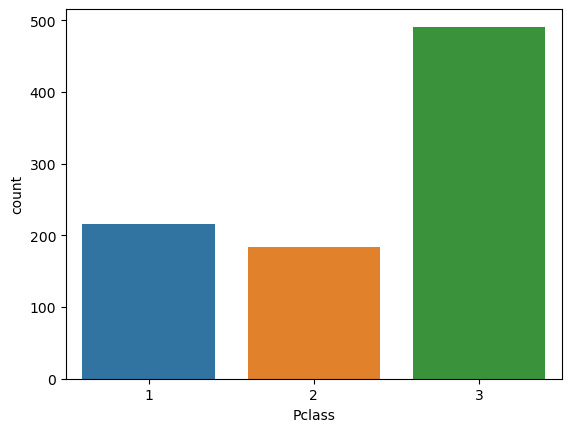

In [14]:
sns.countplot(train['Pclass']) 

#"Pclass" stands for "Passenger Class" and is an important feature in datasets related to the passengers aboard the RMS Titanic. It represents the class or socio-economic status of each passenger on the ship.

C:\Users\sivap\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

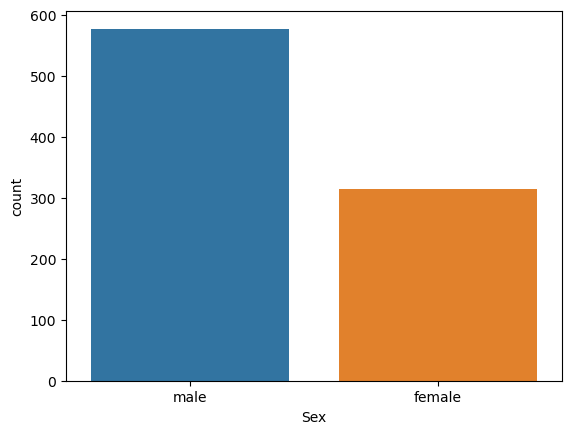

In [15]:

sns.countplot(train['Sex'])

C:\Users\sivap\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SibSp', ylabel='count'>

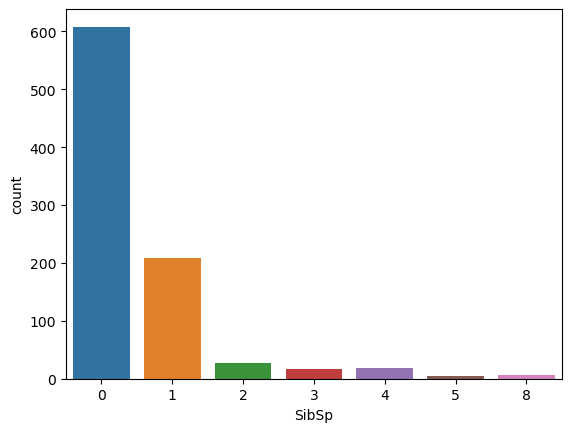

In [16]:
sns.countplot(train['SibSp']) 

#It refers to the number of siblings or spouses a particular passenger had on board the ship.

C:\Users\sivap\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Parch', ylabel='count'>

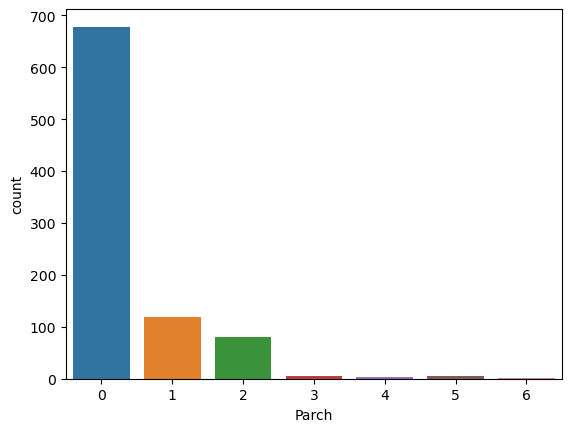

In [17]:
sns.countplot(train['Parch']) 
# It refers to the number of parents or children a particular passenger had on board the ship.

C:\Users\sivap\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Embarked', ylabel='count'>

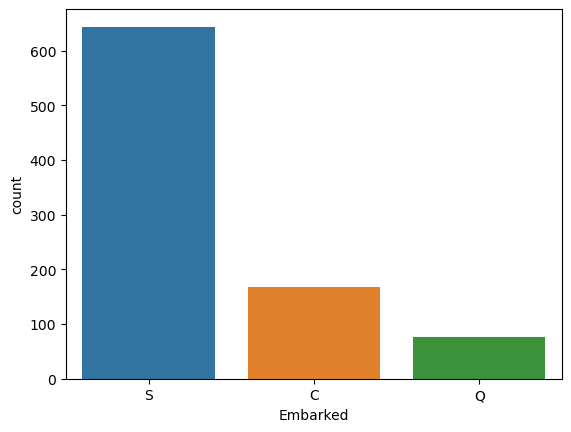

In [18]:
sns.countplot(train['Embarked']) 

#It refers to the port or location where a particular passenger boarded the ship.

C:\Users\sivap\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

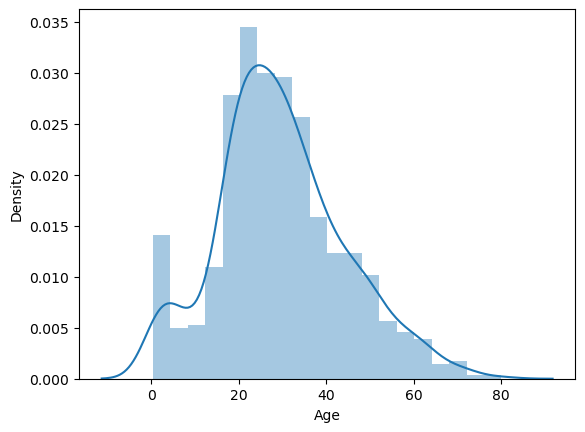

In [19]:
sns.distplot(train['Age'])

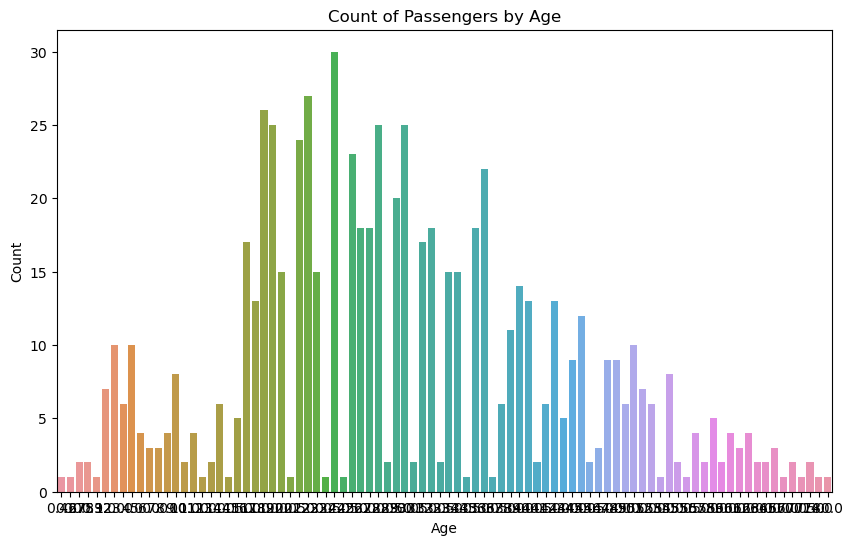

In [20]:
# Set the chart size using matplotlib
plt.figure(figsize=(10, 6))

# Create the count plot using seaborn
sns.countplot(data=train, x='Age')

# Optionally, you can add titles and labels
plt.title('Count of Passengers by Age')
plt.xlabel('Age')
plt.ylabel('Count')

# Show the plot
plt.show()

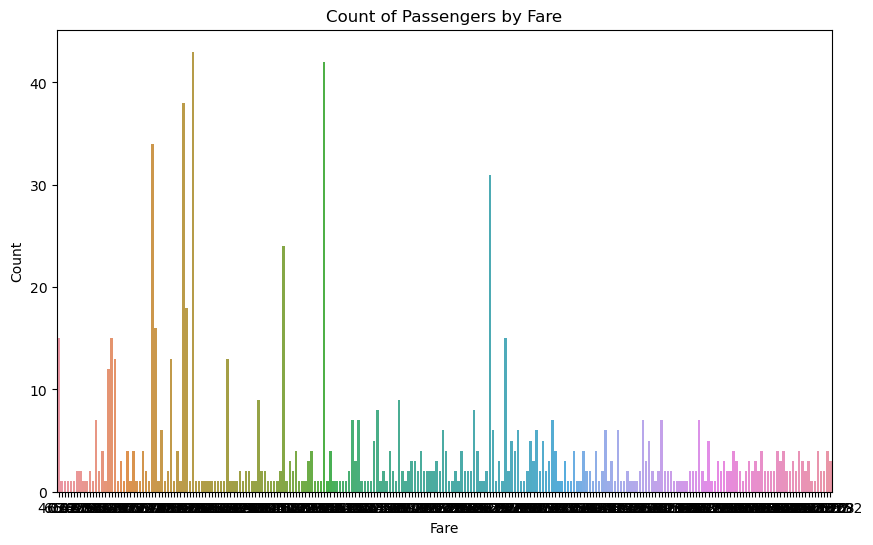

In [21]:
# Set the chart size using matplotlib
plt.figure(figsize=(10, 6))

# Create the count plot using seaborn
sns.countplot(data=train, x='Fare')

# Optionally, you can add titles and labels
plt.title('Count of Passengers by Fare')
plt.xlabel('Fare')
plt.ylabel('Count')

# Show the plot
plt.show()

C:\Users\sivap\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

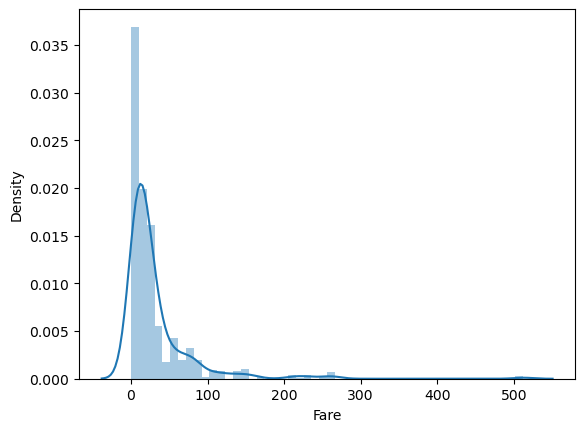

In [22]:
sns.distplot(train['Fare'])

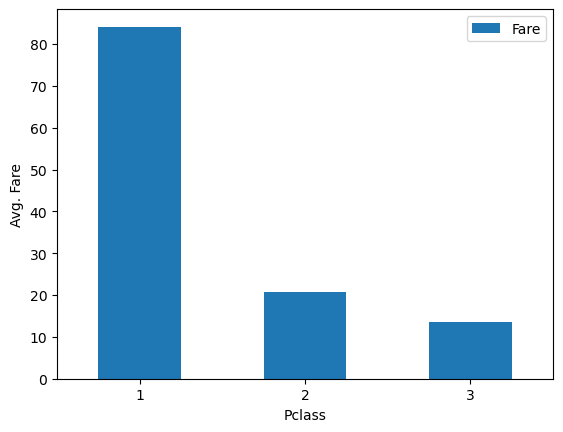

In [23]:
class_fare = train.pivot_table(index='Pclass', values='Fare')
class_fare.plot(kind='bar')
plt.xlabel('Pclass')
plt.ylabel('Avg. Fare')
plt.xticks(rotation=0)
plt.show()

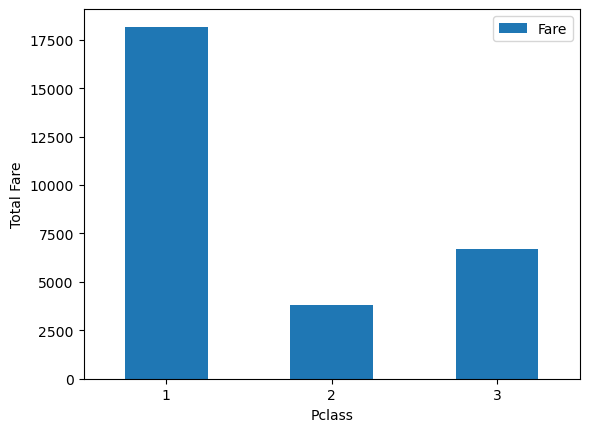

In [24]:
class_fare = train.pivot_table(index='Pclass', values='Fare', aggfunc=np.sum)
class_fare.plot(kind='bar')
plt.xlabel('Pclass')
plt.ylabel('Total Fare')
plt.xticks(rotation=0)
plt.show()

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

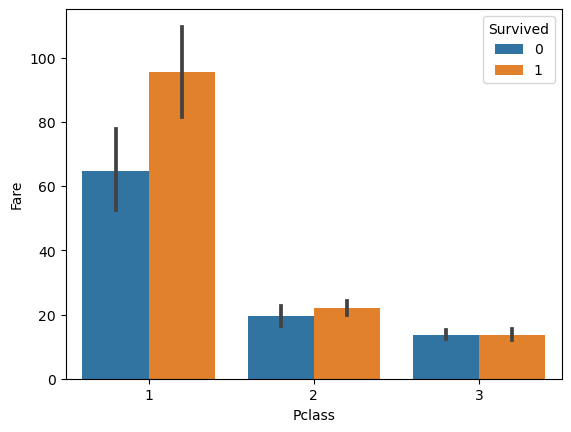

In [25]:
sns.barplot(data=train, x='Pclass', y='Fare', hue='Survived')

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

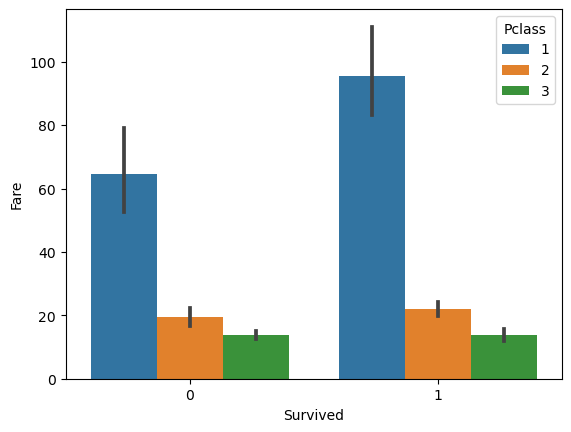

In [26]:
sns.barplot(data=train, x='Survived', y='Fare', hue='Pclass')

Correlation Matrix

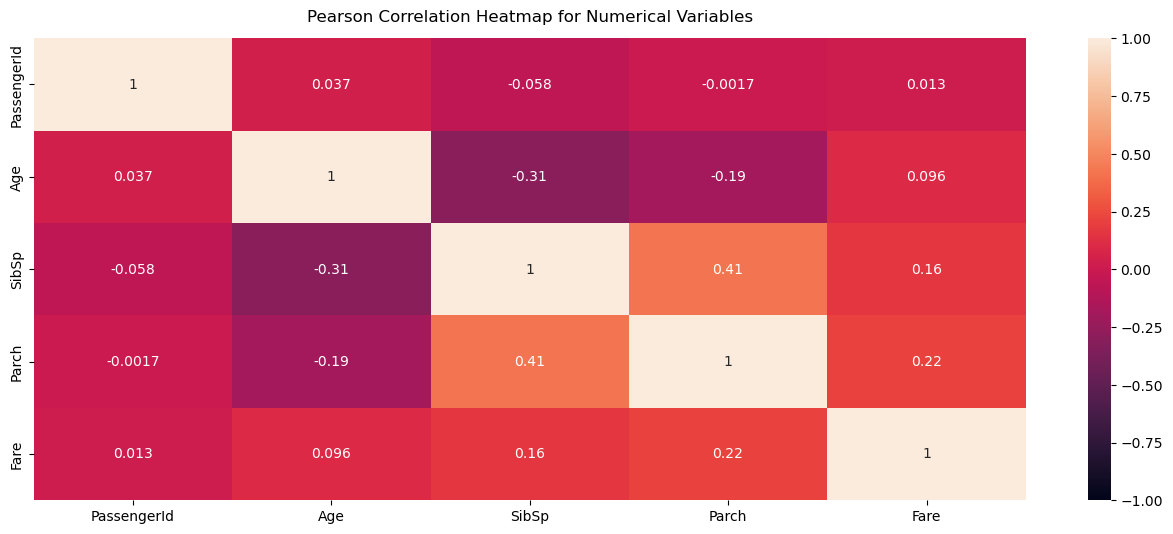

In [27]:
#heat map to see numerical correlations, pearson measures monotonic relationship (numerical or ordinal categorical)
plt.figure(figsize=(16, 6))
sns.heatmap(train[numerical].corr(method='pearson'), vmin=-1, vmax=1, annot=True)
plt.title('Pearson Correlation Heatmap for Numerical Variables', fontdict={'fontsize':12}, pad=12);

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


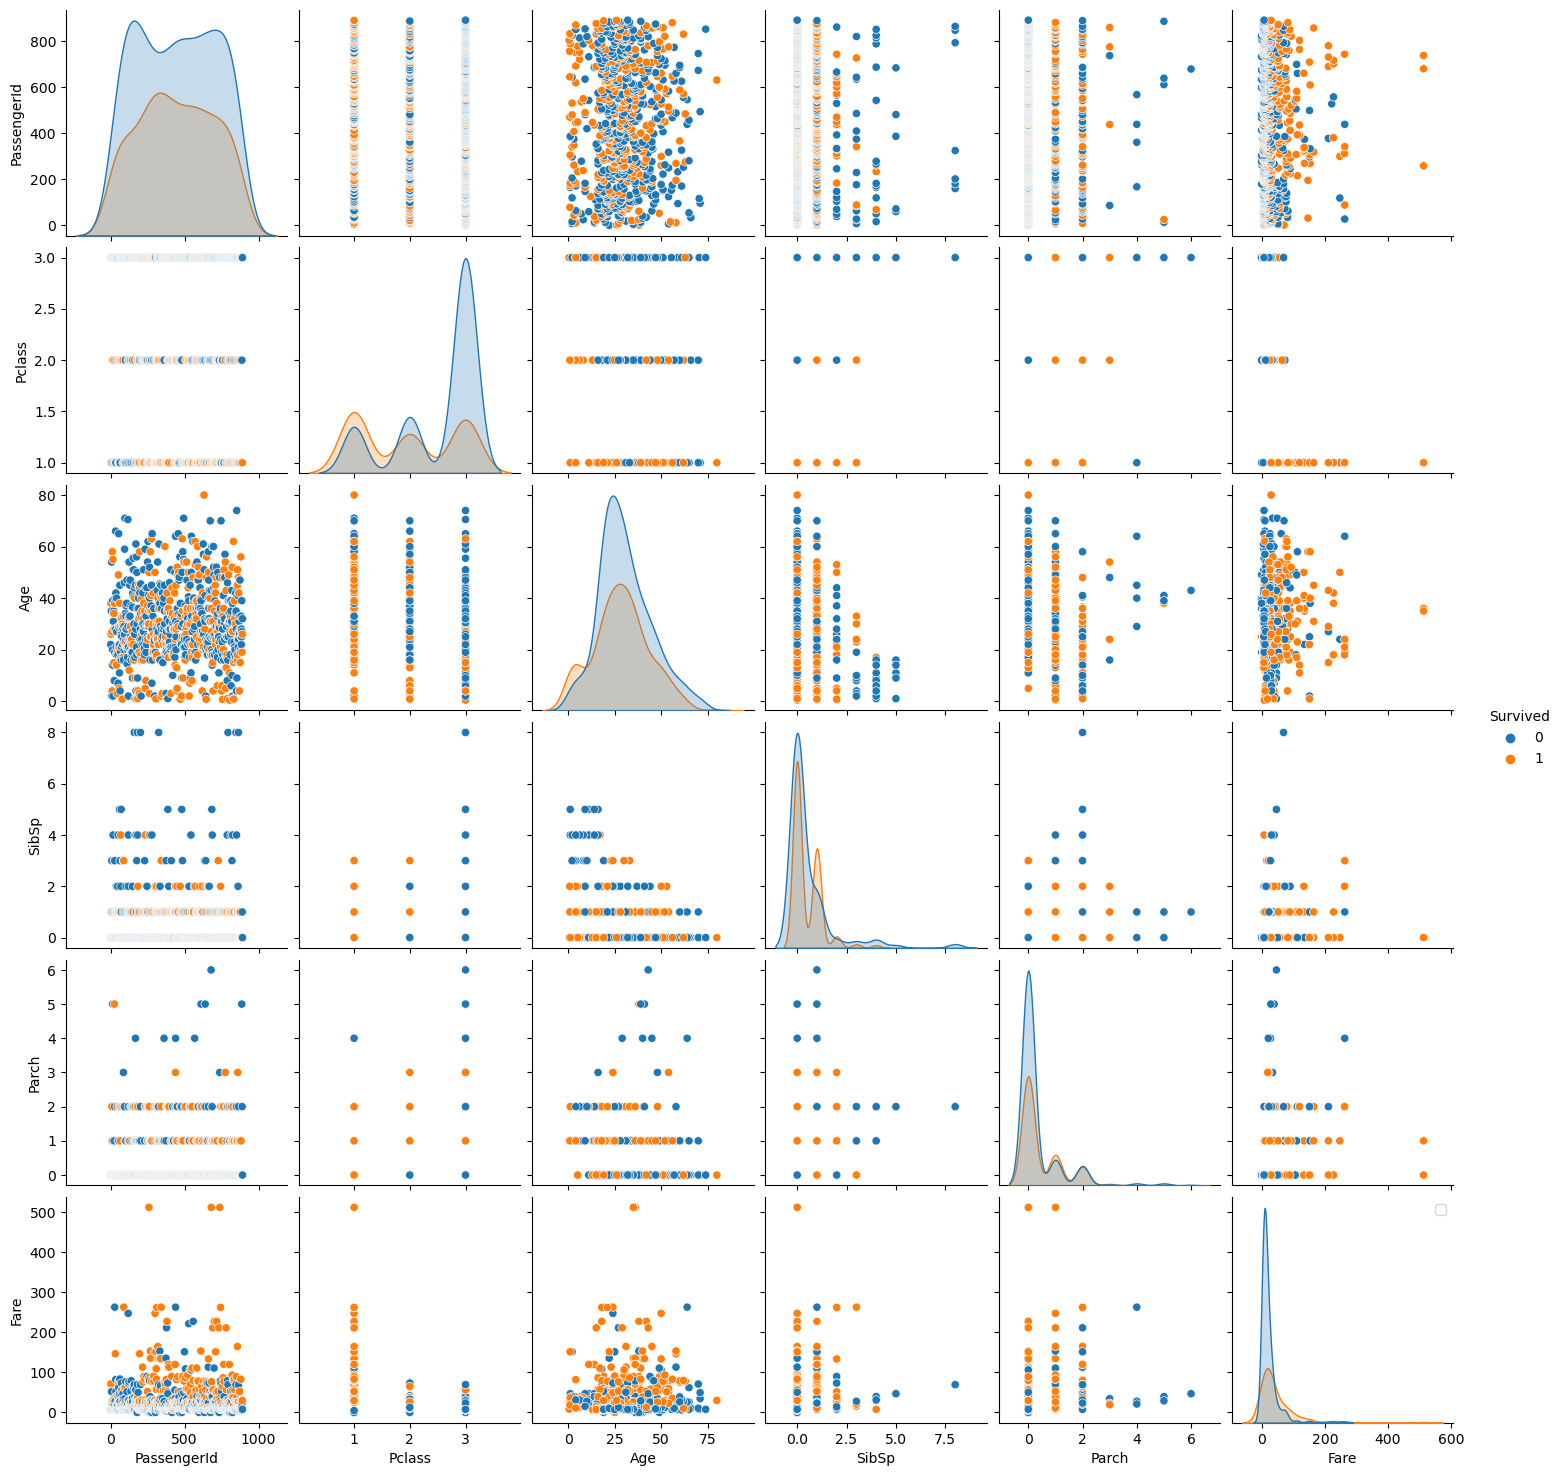

In [28]:
#look at how target is distributed among variables
sns.pairplot(train,hue='Survived')
plt.legend()
plt.show()

Data PreProcessing

In [29]:
train_len = len(train)
# combine two dataframes
data = pd.concat([train, test], axis=0)
data = data.reset_index(drop=True)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [30]:
data.shape

(1309, 12)

In [31]:
data.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [32]:
data = data.drop(columns=['Cabin'], axis=1) 

#1014 values are null out of 1309 values, so we are dropping the column Cabin

In [33]:
# filling the missing values using mean of the numerical column
data['Age'] = data['Age'].fillna(data['Age'].mean())
data['Fare'] = data['Fare'].fillna(data['Fare'].mean())

In [34]:
# fill missing values using mode of the categorical column
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

In [35]:
data.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [36]:
# Fill null values in the 'Survived' column with the mode value

mode_survived = data['Survived'].mean()
data['Survived'].fillna(mode_survived, inplace=True)

In [37]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Correlation matrix

<AxesSubplot:>

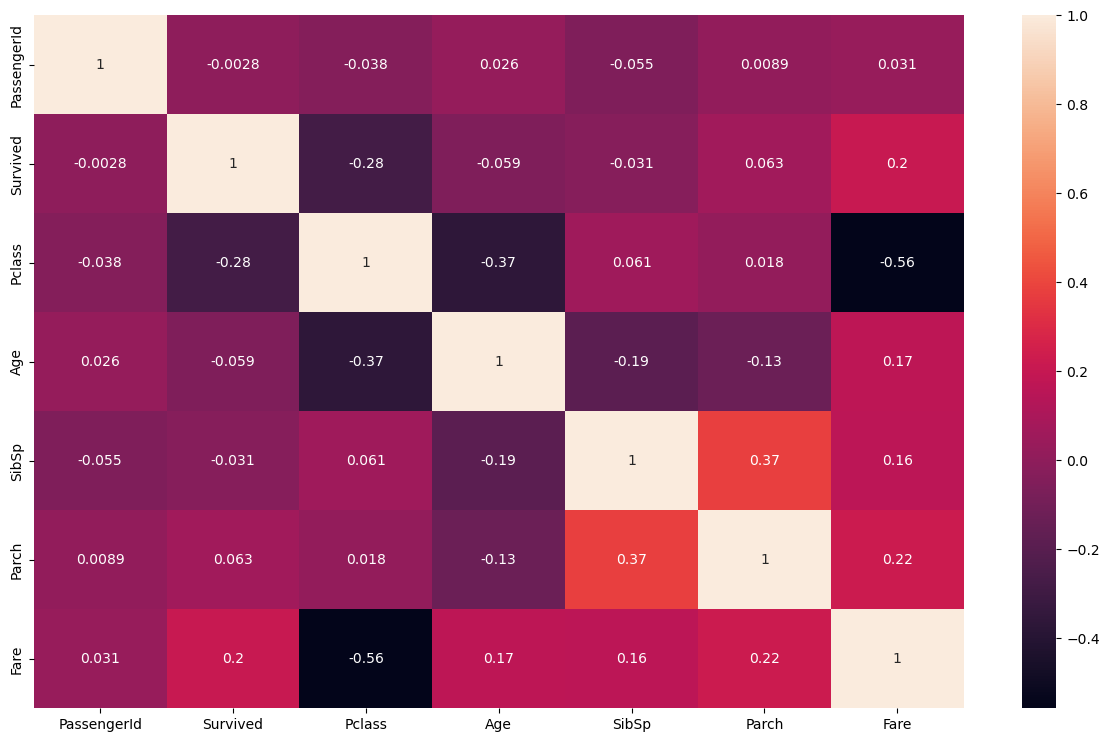

In [40]:
corr = data.corr()
plt.figure(figsize=(15, 9))
sns.heatmap(corr, annot=True)

In [ ]:
#Removal or dropping of unwanted columns

In [42]:
#since these columns doesnot provide us any valuable information
data = data.drop(columns=['Name', 'Ticket'], axis=1)
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,male,22.0,1,0,7.2500,S
1,2,1.0,1,female,38.0,1,0,71.2833,C
2,3,1.0,3,female,26.0,0,0,7.9250,S
3,4,1.0,1,female,35.0,1,0,53.1000,S
4,5,0.0,3,male,35.0,0,0,8.0500,S


Label Encoding

In [46]:
from sklearn.preprocessing import LabelEncoder
cols = ['Sex', 'Embarked']
le = LabelEncoder()

for col in cols:
    data[col] = le.fit_transform(data[col])
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,1,22.0,1,0,7.2500,2
1,2,1.0,1,0,38.0,1,0,71.2833,0
2,3,1.0,3,0,26.0,0,0,7.9250,2
3,4,1.0,1,0,35.0,1,0,53.1000,2
4,5,0.0,3,1,35.0,0,0,8.0500,2


Train-Test split

In [47]:
train = data.iloc[:train_len, :]
test = data.iloc[train_len:, :]

In [48]:
test.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
891,892,0.383838,3,1,34.5,0,0,7.8292,1
892,893,0.383838,3,0,47.0,1,0,7.0000,2
893,894,0.383838,2,1,62.0,0,0,9.6875,1
894,895,0.383838,3,1,27.0,0,0,8.6625,2
895,896,0.383838,3,0,22.0,1,1,12.2875,2


In [49]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,1,22.0,1,0,7.2500,2
1,2,1.0,1,0,38.0,1,0,71.2833,0
2,3,1.0,3,0,26.0,0,0,7.9250,2
3,4,1.0,1,0,35.0,1,0,53.1000,2
4,5,0.0,3,1,35.0,0,0,8.0500,2


In [50]:
# input split
X = train.drop(columns=['PassengerId', 'Survived'], axis=1)
y = train['Survived']

In [51]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2


Model Training

In [52]:
from sklearn.model_selection import train_test_split, cross_val_score
# classify column
def classify(model):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    model.fit(x_train, y_train)
    print('Accuracy:', model.score(x_test, y_test))
    
    score = cross_val_score(model, X, y, cv=5)
    print('CV Score:', np.mean(score))

In [53]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model)

Accuracy: 0.8071748878923767
CV Score: 0.786761659657272


C:\Users\sivap\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\sivap\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [54]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model)

Accuracy: 0.726457399103139
CV Score: 0.775563367020275


In [55]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
classify(model)

Accuracy: 0.8071748878923767
CV Score: 0.8114807607808675


In [56]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
classify(model)

Accuracy: 0.7892376681614349
CV Score: 0.7980101688531793


In [59]:
pip install xgboost

     -------------------------------------- 70.9/70.9 MB 619.7 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [61]:
from xgboost import XGBClassifier
model = XGBClassifier()
classify(model)

Accuracy: 0.7892376681614349
CV Score: 0.8125980792166217


In [62]:
pip install lightgbm

     ---------------------------------------- 1.3/1.3 MB 655.0 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [63]:
from lightgbm import LGBMClassifier
model = LGBMClassifier()
classify(model)

[LightGBM] [Info] Number of positive: 253, number of negative: 415
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000258 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 191
[LightGBM] [Info] Number of data points in the train set: 668, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.378743 -> initscore=-0.494889
[LightGBM] [Info] Start training from score -0.494889
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

In [64]:
from catboost import CatBoostClassifier
model = CatBoostClassifier(verbose=0)
classify(model)

Accuracy: 0.8295964125560538
CV Score: 0.8226790534178645


In [66]:
model = CatBoostClassifier()
model.fit(X,y)

Learning rate set to 0.009807
0:	learn: 0.6863480	total: 1.84ms	remaining: 1.83s
1:	learn: 0.6791088	total: 3.88ms	remaining: 1.94s
2:	learn: 0.6730850	total: 5.82ms	remaining: 1.93s
3:	learn: 0.6670438	total: 7.87ms	remaining: 1.96s
4:	learn: 0.6612171	total: 10.1ms	remaining: 2.01s
5:	learn: 0.6559256	total: 12.7ms	remaining: 2.11s
6:	learn: 0.6501776	total: 15.1ms	remaining: 2.14s
7:	learn: 0.6448041	total: 17.4ms	remaining: 2.16s
8:	learn: 0.6389785	total: 19.8ms	remaining: 2.18s
9:	learn: 0.6337792	total: 22.2ms	remaining: 2.2s
10:	learn: 0.6295823	total: 24.6ms	remaining: 2.21s
11:	learn: 0.6238853	total: 27.1ms	remaining: 2.23s
12:	learn: 0.6191147	total: 29.4ms	remaining: 2.23s
13:	learn: 0.6146894	total: 30.9ms	remaining: 2.18s
14:	learn: 0.6108572	total: 32.3ms	remaining: 2.12s
15:	learn: 0.6064272	total: 34ms	remaining: 2.09s
16:	learn: 0.6021318	total: 35.7ms	remaining: 2.06s
17:	learn: 0.5977094	total: 37.4ms	remaining: 2.04s
18:	learn: 0.5953404	total: 38.2ms	remaining: 1

In [67]:
test.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
891,892,0.383838,3,1,34.5,0,0,7.8292,1
892,893,0.383838,3,0,47.0,1,0,7.0000,2
893,894,0.383838,2,1,62.0,0,0,9.6875,1
894,895,0.383838,3,1,27.0,0,0,8.6625,2
895,896,0.383838,3,0,22.0,1,1,12.2875,2


In [68]:
# input split for test data
X_test = test.drop(columns=['PassengerId', 'Survived'], axis=1)

In [69]:
X_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
891,3,1,34.5,0,0,7.8292,1
892,3,0,47.0,1,0,7.0000,2
893,2,1,62.0,0,0,9.6875,1
894,3,1,27.0,0,0,8.6625,2
895,3,0,22.0,1,1,12.2875,2


In [70]:
pred = model.predict(X_test)
pred

array([0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 0., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0.,
       1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 1.

Test Submission

In [73]:
sub = pd.read_csv("Vote_submission.csv")
sub.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [74]:
sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


In [75]:
sub['Survived'] = pred
sub['Survived'] = sub['Survived'].astype('int')

In [78]:
sub.head(50)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [77]:
sub.to_csv('submission.csv', index=False)